unzipping Data

In [25]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: tinyface/Training_Set/2898/2898_1.jpg  
  inflating: tinyface/Training_Set/2898/2898_2.jpg  
  inflating: tinyface/Training_Set/2899/2899_1.jpg  
  inflating: tinyface/Training_Set/2899/2899_2.jpg  
  inflating: tinyface/Training_Set/2900/2900_1.jpg  
  inflating: tinyface/Training_Set/2900/2900_2.jpg  
  inflating: tinyface/Training_Set/2900/2900_3.jpg  
  inflating: tinyface/Training_Set/2902/2902_1.jpg  
  inflating: tinyface/Training_Set/2902/2902_2.jpg  
  inflating: tinyface/Training_Set/2903/2903_1.jpg  
  inflating: tinyface/Training_Set/2903/2903_2.jpg  
  inflating: tinyface/Training_Set/2904/2904_1.jpg  
  inflating: tinyface/Training_Set/2904/2904_2.jpg  
  inflating: tinyface/Training_Set/2904/2904_3.jpg  
  inflating: tinyface/Training_Set/2905/2905_1.jpg  
  inflating: tinyface/Training_Set/2905/2905_2.jpg  
  inflating: tinyface/Training_Set/2905/2905_3.jpg  
  inflating: tinyface/Training_Set/2905/2905_4.j

Libraries that were used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as ks
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import random as rand
import seaborn as sns
import scipy as sci
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import os
import cv2
from math import log10, sqrt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.utils import to_categorical

Loading Training and Testing Data

In [26]:
Training = []
Result_Training = []
for dirname, _, filenames in os.walk('/content/tinyface/Training_Set/'):
    for filename in filenames:
        img = cv2.imread(os.path.join(dirname, filename))
        i = rand.randint(0, 5000)%100
        if i <= 5:
          Result_Training.append(0)
        else:
          Result_Training.append(1)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        Training.append(img)
np.array(Training).shape, np.array(Result_Training).shape

((7804, 32, 32, 3), (7804,))

In [27]:
Testing = []
Result_Testing = []
for dirname, _, filenames in os.walk('/content/tinyface/Testing_Set/Gallery_Match'):
    for filename in filenames:
      try:
        img = cv2.imread(os.path.join(dirname, filename))
        i = rand.randint(0, 5000)%100
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if i <= 5:
          Result_Testing.append(0)
        else:
          Result_Testing.append(1)
        Testing.append(img)
      except:
        continue
np.array(Testing).shape, np.array(Result_Testing).shape

((4443, 32, 32, 3), (4443,))

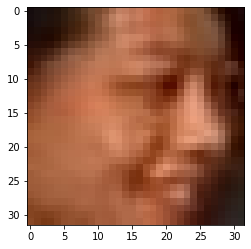

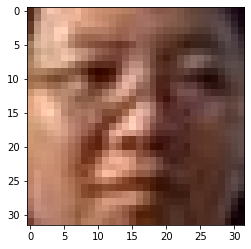

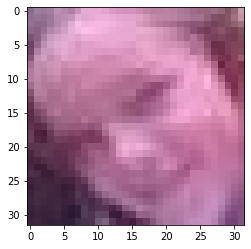

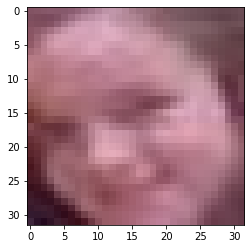

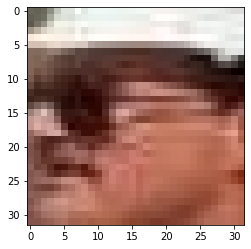

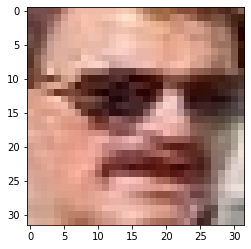

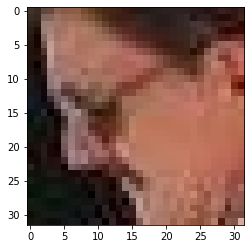

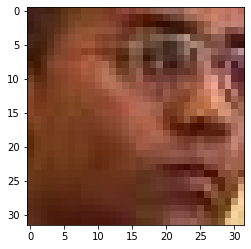

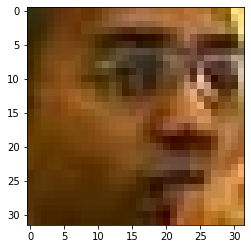

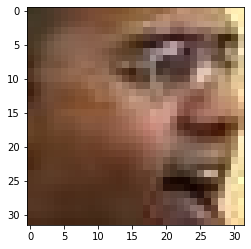

In [28]:
for i in range(10):
    plt.imshow(Training[i])
    plt.show()

In [29]:
Result = Result_Training
Result.extend(Result_Testing)
np.array(Result).shape

(12247,)

In [30]:
Training.extend(Testing)
np.array(Training).shape

(12247, 32, 32, 3)

**Data preprocessing and models**

In [31]:
Temp = []
for i in Result:
  temp = [i]
  Temp.append(temp)
output_matrix = to_categorical(np.array(Temp))
total = output_matrix.shape[1]
output_matrix.shape

(12247, 2)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(Training), np.array(output_matrix), shuffle=True, random_state=128, train_size=.9)
X_train.shape, X_test.shape 

((11022, 32, 32, 3), (1225, 32, 32, 3))

In [33]:
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32, 32, 3),
                   pooling='avg',classes=total,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(2048, activation='relu'))
resnet_model.add(Dense(total, activation='softmax'))

In [34]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_5 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 27,788,162
Trainable params: 4,200,450
Non-trainable params: 23,587,712
_________________________________________________________________


# ResNet50 using TinyFace

In [35]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = resnet_model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
276/276 [==============================] - 12s 29ms/step - loss: 0.3843 - accuracy: 0.9367 - val_loss: 0.2502 - val_accuracy: 0.9392
Epoch 2/100
276/276 [==============================] - 6s 20ms/step - loss: 0.2187 - accuracy: 0.9425 - val_loss: 0.2802 - val_accuracy: 0.9397
Epoch 3/100
276/276 [==============================] - 6s 23ms/step - loss: 0.1931 - accuracy: 0.9440 - val_loss: 0.2930 - val_accuracy: 0.9211
Epoch 4/100
276/276 [==============================] - 4s 16ms/step - loss: 0.1586 - accuracy: 0.9509 - val_loss: 0.3299 - val_accuracy: 0.9116
Epoch 5/100
276/276 [==============================] - 5s 17ms/step - loss: 0.1249 - accuracy: 0.9604 - val_loss: 0.3891 - val_accuracy: 0.9347
Epoch 6/100
276/276 [==============================] - 5s 17ms/step - loss: 0.0936 - accuracy: 0.9714 - val_loss: 0.3580 - val_accuracy: 0.9288
Epoch 7/100
276/276 [==============================] - 5s 19ms/step - loss: 0.0599 - accuracy: 0.9790 - val_loss: 0.4194 - val_accuracy

**Graphs and Predictions**

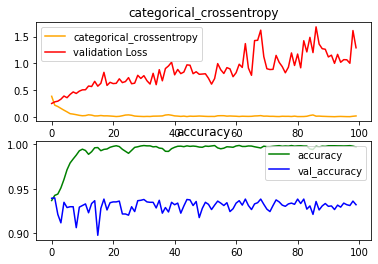

In [36]:
plt.subplot(2,1,1)
plt.plot(history.history["loss"], color='orange')
plt.plot(history.history["val_loss"], color="red")
plt.legend(["categorical_crossentropy", "validation Loss"])
plt.title("categorical_crossentropy")
plt.subplot(2,1,2)
plt.plot(history.history["accuracy"], color='green')
plt.plot(history.history["val_accuracy"], color='blue')
plt.legend(["accuracy", "val_accuracy"])
plt.title("accuracy")
plt.show()

In [37]:
pre = resnet_model.predict(X_test)

39/39 [==============================] - 2s 17ms/step


In [38]:
y_pre = []
y_real = []
for i in range(len(pre)):
  y_pre.append(np.argmax(pre[i]))
  y_real.append(np.argmax(Y_test[i]))

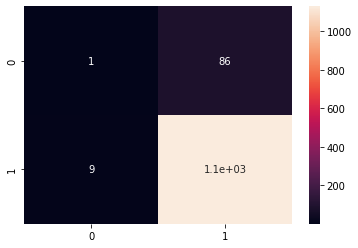

In [39]:
sns.heatmap(confusion_matrix(y_real, y_pre), annot=True)

In [40]:
accuracy_score(y_real, y_pre)

0.9224489795918367

In [41]:
mobile_model = Sequential()
pretrained_model= MobileNetV2(include_top=False,
                   input_shape=(32, 32, 3),
                   pooling='avg',classes=total,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

mobile_model.add(pretrained_model)
mobile_model.add(Flatten())
mobile_model.add(Dense(2048, activation='relu'))
mobile_model.add(Dense(total, activation='softmax'))

# MobileNetv2 using TinyFace

In [42]:
mobile_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = mobile_model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
276/276 [==============================] - 9s 19ms/step - loss: 0.2376 - accuracy: 0.9412 - val_loss: 0.2320 - val_accuracy: 0.9397
Epoch 2/100
276/276 [==============================] - 3s 11ms/step - loss: 0.2194 - accuracy: 0.9439 - val_loss: 0.2311 - val_accuracy: 0.9397
Epoch 3/100
276/276 [==============================] - 3s 11ms/step - loss: 0.2176 - accuracy: 0.9437 - val_loss: 0.2316 - val_accuracy: 0.9397
Epoch 4/100
276/276 [==============================] - 4s 15ms/step - loss: 0.2150 - accuracy: 0.9443 - val_loss: 0.2314 - val_accuracy: 0.9392
Epoch 5/100
276/276 [==============================] - 3s 11ms/step - loss: 0.2142 - accuracy: 0.9448 - val_loss: 0.2345 - val_accuracy: 0.9392
Epoch 6/100
276/276 [==============================] - 3s 11ms/step - loss: 0.2119 - accuracy: 0.9447 - val_loss: 0.2310 - val_accuracy: 0.9392
Epoch 7/100
276/276 [==============================] - 3s 11ms/step - loss: 0.2105 - accuracy: 0.9447 - val_loss: 0.2336 - val_accuracy:

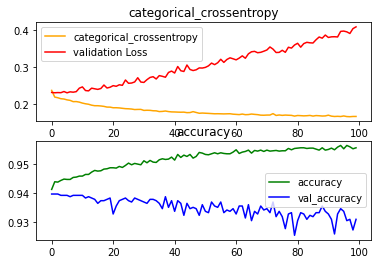

In [43]:
plt.subplot(2,1,1)
plt.plot(history.history["loss"], color='orange')
plt.plot(history.history["val_loss"], color="red")
plt.legend(["categorical_crossentropy", "validation Loss"])
plt.title("categorical_crossentropy")
plt.subplot(2,1,2)
plt.plot(history.history["accuracy"], color='green')
plt.plot(history.history["val_accuracy"], color='blue')
plt.legend(["accuracy", "val_accuracy"])
plt.title("accuracy")
plt.show()

In [44]:
pre = mobile_model.predict(X_test)

39/39 [==============================] - 1s 14ms/step


In [45]:
y_pre = []
y_real = []
for i in range(len(pre)):
  y_pre.append(np.argmax(pre[i]))
  y_real.append(np.argmax(Y_test[i]))

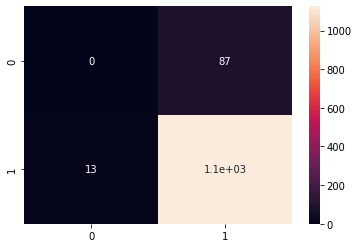

In [46]:
sns.heatmap(confusion_matrix(y_real, y_pre), annot=True)

In [47]:
accuracy_score(y_real, y_pre)

0.9183673469387755

# LFW Dataset

In [2]:
!unzip lfw_funneled.zip

Archive:  lfw_funneled.zip
   creating: lfw_funneled/
   creating: lfw_funneled/George_HW_Bush/
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0001.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0002.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0003.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0004.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0005.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0006.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0007.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0008.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0009.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0010.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0011.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0012.jpg  
  inflating: lfw_funneled/George_HW_Bush/George_HW_Bush_0013.jpg  
   creating: lfw_funneled/Curtis_

Loading Data

In [3]:
Training = []
Result_Training = []
for dirname, _, filenames in os.walk('/content/lfw_funneled/'):
    for filename in filenames:
        img = cv2.imread(os.path.join(dirname, filename))
        Result_Training.append(filename.split("_")[0])
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        Training.append(img)
np.array(Training).shape, np.array(Result_Training).shape

((621, 32, 32, 3), (621,))

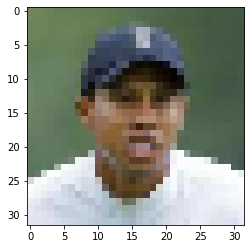

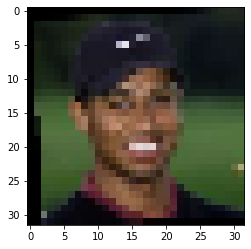

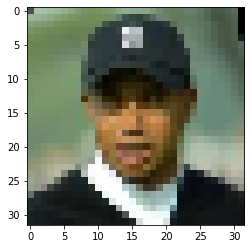

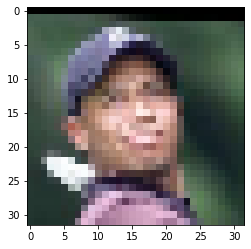

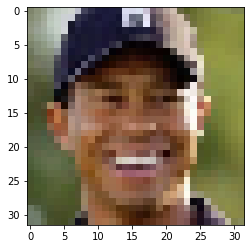

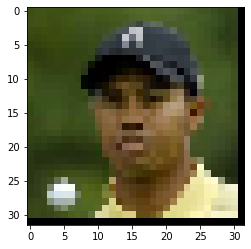

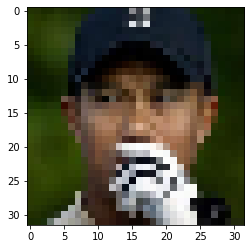

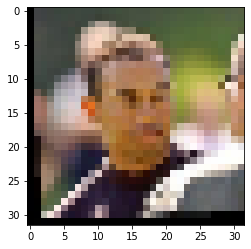

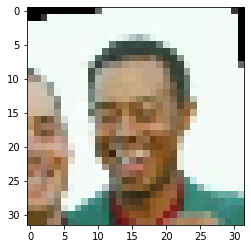

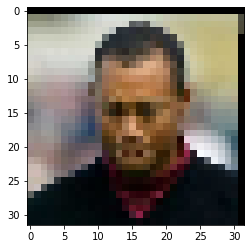

In [4]:
for i in range(10):
    plt.imshow(Training[i])
    plt.show()

In [5]:
Result = Result_Training
np.array(Result).shape

(621,)

In [6]:
np.array(Training).shape

(621, 32, 32, 3)

In [7]:
lb = LabelEncoder()
Result = lb.fit_transform(Result)

In [8]:
Temp = []
for i in Result:
  temp = [i]
  Temp.append(temp)
output_matrix = to_categorical(np.array(Temp))
total = output_matrix.shape[1]
output_matrix.shape

(621, 48)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(Training), np.array(output_matrix), shuffle=True, random_state=128, train_size=.9)
X_train.shape, X_test.shape 

((558, 32, 32, 3), (63, 32, 32, 3))

In [10]:
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32, 32, 3),
                   pooling='avg',classes=total,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(2048, activation='relu'))
resnet_model.add(Dense(total, activation='softmax'))

94765736/94765736 [==============================] - 5s 0us/step


In [11]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 48)                98352     
                                                                 
Total params: 27,882,416
Trainable params: 4,294,704
Non-trainable params: 23,587,712
_________________________________________________________________


# ResNet50 using LFW

In [12]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = resnet_model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 13s 141ms/step - loss: 8.7571 - accuracy: 0.2265 - val_loss: 4.6321 - val_accuracy: 0.2589
Epoch 2/100
14/14 [==============================] - 0s 20ms/step - loss: 2.0158 - accuracy: 0.5561 - val_loss: 3.3337 - val_accuracy: 0.2946
Epoch 3/100
14/14 [==============================] - 0s 18ms/step - loss: 0.6197 - accuracy: 0.8341 - val_loss: 3.3481 - val_accuracy: 0.3125
Epoch 4/100
14/14 [==============================] - 0s 19ms/step - loss: 0.2147 - accuracy: 0.9529 - val_loss: 3.4586 - val_accuracy: 0.3482
Epoch 5/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0787 - accuracy: 0.9933 - val_loss: 3.8714 - val_accuracy: 0.3482
Epoch 6/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 3.9511 - val_accuracy: 0.3571
Epoch 7/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 4.0475 - val_accuracy: 0.3393
Epoc

Graph and Predictions

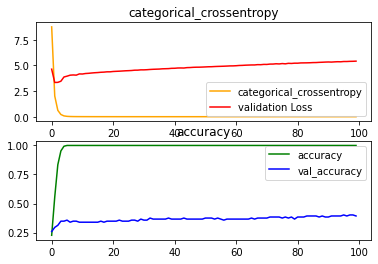

In [13]:
plt.subplot(2,1,1)
plt.plot(history.history["loss"], color='orange')
plt.plot(history.history["val_loss"], color="red")
plt.legend(["categorical_crossentropy", "validation Loss"])
plt.title("categorical_crossentropy")
plt.subplot(2,1,2)
plt.plot(history.history["accuracy"], color='green')
plt.plot(history.history["val_accuracy"], color='blue')
plt.legend(["accuracy", "val_accuracy"])
plt.title("accuracy")
plt.show()

In [14]:
pre = resnet_model.predict(X_test)

2/2 [==============================] - 1s 325ms/step


In [15]:
y_pre = []
y_real = []
for i in range(len(pre)):
  y_pre.append(np.argmax(pre[i]))
  y_real.append(np.argmax(Y_test[i]))

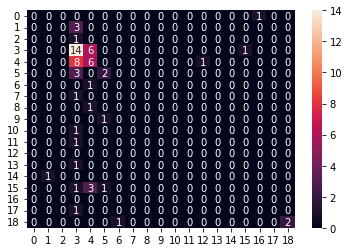

In [16]:
sns.heatmap(confusion_matrix(y_real, y_pre), annot=True)

In [17]:
accuracy_score(y_real, y_pre)

0.38095238095238093

In [18]:
mobile_model = Sequential()
pretrained_model= MobileNetV2(include_top=False,
                   input_shape=(32, 32, 3),
                   pooling='avg',classes=total,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

mobile_model.add(pretrained_model)
mobile_model.add(Flatten())
mobile_model.add(Dense(2048, activation='relu'))
mobile_model.add(Dense(total, activation='softmax'))

9406464/9406464 [==============================] - 0s 0us/step


# MobileNet50 using LFW

In [19]:
mobile_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = mobile_model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
16/16 [==============================] - 5s 94ms/step - loss: 3.2964 - accuracy: 0.3307 - val_loss: 2.8084 - val_accuracy: 0.2857
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 2.6884 - accuracy: 0.3645 - val_loss: 2.5413 - val_accuracy: 0.3036
Epoch 3/100
16/16 [==============================] - 0s 11ms/step - loss: 2.5162 - accuracy: 0.3785 - val_loss: 2.5520 - val_accuracy: 0.2857
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 2.4059 - accuracy: 0.3825 - val_loss: 2.5509 - val_accuracy: 0.2679
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 2.3139 - accuracy: 0.3904 - val_loss: 2.6083 - val_accuracy: 0.2679
Epoch 6/100
16/16 [==============================] - 0s 12ms/step - loss: 2.2210 - accuracy: 0.4084 - val_loss: 2.6085 - val_accuracy: 0.2500
Epoch 7/100
16/16 [==============================] - 0s 11ms/step - loss: 2.1455 - accuracy: 0.4203 - val_loss: 2.6595 - val_accuracy: 0.2857
Epoch 

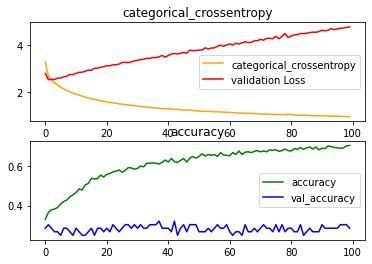

In [20]:
plt.subplot(2,1,1)
plt.plot(history.history["loss"], color='orange')
plt.plot(history.history["val_loss"], color="red")
plt.legend(["categorical_crossentropy", "validation Loss"])
plt.title("categorical_crossentropy")
plt.subplot(2,1,2)
plt.plot(history.history["accuracy"], color='green')
plt.plot(history.history["val_accuracy"], color='blue')
plt.legend(["accuracy", "val_accuracy"])
plt.title("accuracy")
plt.show()

In [21]:
pre = mobile_model.predict(X_test)

2/2 [==============================] - 1s 296ms/step


In [22]:
y_pre = []
y_real = []
for i in range(len(pre)):
  y_pre.append(np.argmax(pre[i]))
  y_real.append(np.argmax(Y_test[i]))

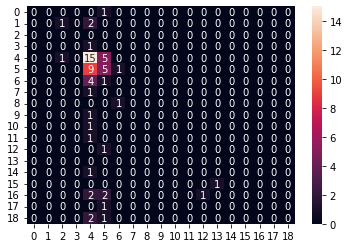

In [23]:
sns.heatmap(confusion_matrix(y_real, y_pre), annot=True)

In [24]:
accuracy_score(y_real, y_pre)

0.31746031746031744